# Gaming the System: A Statistical Look at Video Game Sales
## Jordan Sims
### Overview

I have decided that for my project I am going to be using a few different datasets to analyze video games sales and see what variables appear to affect video game sales most. I will be looking at variables such as game release date, genre, game difficulty, average time to beat, and others. That will then go into predicting what makes a game both a financial and critical success. I believe this is going to be a regression problem using multiple variables!

Why am I doing this? I personally just think this kind of problem is interesting. Video games are a hobby of mine, and I have a potential goal to develop one one day. So knowning things like best release window, popular genres, and other statistics would help me if I ever wish to make that dream a profitable reality!

BONUS: I don't really know if this qualifies for bonus material but I certainly came up with topic and problem all on my own! I was between a few different things that interested me, and this is the one that seemed to have the most data to support it!

### Datasets
Before I describe my data, let me get it imported so I can then draw on it for some analyis about the raw data before any cleaning!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
vGameDataDF = pd.read_csv('game_info.csv', header=0)
salesDataDF = pd.read_csv('vgsales.csv', header=0)
gameFaqDF = pd.read_csv('gamefaqs_rankings_feb_2023.csv', header=0)


Below are the three datasets I will be using for this project. All of them are tablular:

#### 1. [Video Game Dataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset)
- This is a dataset is from Kaggle.
- Here is its descrption from the author: *This dataset contains 474417 video games on over 50 platforms including mobiles. All game information was obtained using Python with RAWG API. This dataset was last updated on Dec 22nd 2020. If you are interested in obtaining more recent games, visit the GitHub page for more information. I plan to update this dataset annually.*
- This contains a variety of data such as game rating, time to complete, platform of release, review data, and much more.
- Below is some general info about the untouched data, such as size, column names, and data types!

In [3]:
vGameDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   slug                  474415 non-null  object 
 2   name                  474415 non-null  object 
 3   metacritic            4733 non-null    float64
 4   released              450218 non-null  object 
 5   tba                   474417 non-null  bool   
 6   updated               474417 non-null  object 
 7   website               65041 non-null   object 
 8   rating                474417 non-null  float64
 9   rating_top            474417 non-null  int64  
 10  playtime              474417 non-null  int64  
 11  achievements_count    474417 non-null  int64  
 12  ratings_count         474417 non-null  int64  
 13  suggestions_count     474417 non-null  int64  
 14  game_series_count     474417 non-null  int64  
 15  

#### 2. [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)
- This is a dataset is from Kaggle.
- It contains similar info to the above dataset, but also includes the very important variable of sales data!
- The sales are recorded in millions of USD, and only games that sold more than 100,000 units.
- Below is some general info about the untouched data, such as size, column names, and data types!


In [4]:
salesDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### 3. [GameFAQs over 82100 Rankings + Length & Difficulty](https://www.kaggle.com/datasets/patkle/gamefaqs-82100-rankings-length-and-difficulty)
- This is a dataset is from Kaggle.
- The dataset was pulled from data on the gamefaqs.gamespot.com. The primary reason for the inclusion of this dataset is to get game length and game difficulty information.
- Below is some general info about the untouched data, such as size, column names, and data types!

In [5]:
gameFaqDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82192 entries, 0 to 82191
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      82192 non-null  object 
 1   platform   82192 non-null  object 
 2   rating     82192 non-null  float64
 3   dificulty  72547 non-null  float64
 4   length     57360 non-null  object 
dtypes: float64(2), object(3)
memory usage: 3.1+ MB


### Data Cleaning

Now that we have described our data a bit, let's get to cleaning. First, I am going to be dropping all the rows that will not be relevant for this project. Let's start with the general data DataFrame first.

In [6]:
vGameDataDF.columns.tolist()

['id',
 'slug',
 'name',
 'metacritic',
 'released',
 'tba',
 'updated',
 'website',
 'rating',
 'rating_top',
 'playtime',
 'achievements_count',
 'ratings_count',
 'suggestions_count',
 'game_series_count',
 'reviews_count',
 'platforms',
 'developers',
 'genres',
 'publishers',
 'esrb_rating',
 'added_status_yet',
 'added_status_owned',
 'added_status_beaten',
 'added_status_toplay',
 'added_status_dropped',
 'added_status_playing']

There is a lot of good stuff here, but we don't need all of this data, so let's trim the fat a bit.

In [7]:
vGameDataDF = vGameDataDF.drop(['id','slug','tba','updated', 'website', 'achievements_count', 'added_status_yet','added_status_owned','added_status_beaten','added_status_toplay','added_status_dropped','added_status_playing', 'genres', 'developers', 'publishers', 'rating_top'], axis=1)

vGameDataDF.columns.tolist()

['name',
 'metacritic',
 'released',
 'rating',
 'playtime',
 'ratings_count',
 'suggestions_count',
 'game_series_count',
 'reviews_count',
 'platforms',
 'esrb_rating']

That is much better. Later in the project, I may limit my scope and not use all of these columns, but I feel like this is a good place to start as I feel each of these columns of data could potentially influence or be influenced by sales and ratings.

I will now do the same for the other two datasets!

In [8]:
gameFaqDF.columns.tolist()


['title', 'platform', 'rating', 'dificulty', 'length']

Here, we only really need the name of the game and the difficulty. I would like to use length as well, but they appear to have it ranked on a scale of 1-10, as opposed to the vGameDataDF's 'playtime' column, which is closer to what we are looking for.

In [9]:
gameFaqDF = gameFaqDF.drop(['platform', 'rating', 'length'], axis=1)

gameFaqDF.columns.tolist()

['title', 'dificulty']

In [10]:
salesDataDF.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

Here, we mostly can get rid of all of the redundant data from other data sources, such as the platform and publisher.  We will keep this genre column as opposed to the on in vGameDataDF because this only has one genre, whereas vGameDataDF has multiple per game, which is nice but harder to drill down data on.

In [11]:
salesDataDF = salesDataDF.drop(['Rank', 'Platform', 'Year', 'Publisher'], axis=1)

salesDataDF.columns.tolist()

['Name',
 'Genre',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

Now that that is out of the way, lets merge these DataFrames into our final dataframe and see what we get!

In [12]:
totalDF = vGameDataDF.merge(gameFaqDF, left_on='name', right_on='title').merge(salesDataDF, left_on='name', right_on='Name')

totalDF

,name,metacritic,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,esrb_rating,title,dificulty,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Stellaris,78.0,2016-05-08,4.25,12,421,402,0,428,Linux||PC||Nintendo Switch||macOS,NaN,Stellaris,3.43,Stellaris,Strategy,0.00,0.03,0.0,0.00,0.03
1,Project: Snowblind,76.0,2005-03-29,2.86,1,22,531,0,22,PC,NaN,Project: Snowblind,3.00,Project: Snowblind,Action,0.10,0.08,0.0,0.03,0.21
2,Project: Snowblind,76.0,2005-03-29,2.86,1,22,531,0,22,PC,NaN,Project: Snowblind,3.00,Project: Snowblind,Action,0.08,0.02,0.0,0.00,0.11
3,Project: Snowblind,76.0,2005-03-29,2.86,1,22,531,0,22,PC,NaN,Project: Snowblind,3.04,Project: Snowblind,Action,0.10,0.08,0.0,0.03,0.21
4,Project: Snowblind,76.0,2005-03-29,2.86,1,22,531,0,22,PC,NaN,Project: Snowblind,3.04,Project: Snowblind,Action,0.08,0.02,0.0,0.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27176,Total War: WARHAMMER,86.0,2016-05-24,4.02,9,201,615,0,202,macOS||PC||Linux,NaN,Total War: WARHAMMER,3.33,Total War: WARHAMMER,Strategy,0.00,0.10,0.0,0.01,0.10
27177,Fighter Within,NaN,2013-11-19,0.00,0,4,620,0,4,Xbox One,Teen,Fighter Within,1.94,Fighter Within,Fighting,0.11,0.07,0.0,0.02,0.19
27178,War for the Overworld,65.0,2015-04-01,2.93,5,41,664,0,44,macOS||Linux||PC,Teen,War for the Overworld,2.68,War for the Overworld,Strategy,0.00,0.01,0.0,0.00,0.01
27179,Infected,NaN,2018-07-02,0.00,0,0,18,0,0,Web,NaN,Infected,2.38,Infected,Shooter,0.14,0.00,0.0,0.01,0.16


Okay not bad, but there are obviously duplicates. Let's get rid of all of those!

In [13]:
totalDF = totalDF.drop_duplicates(subset=['name'], keep='first')

totalDF

,name,metacritic,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,esrb_rating,title,dificulty,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Stellaris,78.0,2016-05-08,4.25,12,421,402,0,428,Linux||PC||Nintendo Switch||macOS,NaN,Stellaris,3.43,Stellaris,Strategy,0.00,0.03,0.0,0.00,0.03
1,Project: Snowblind,76.0,2005-03-29,2.86,1,22,531,0,22,PC,NaN,Project: Snowblind,3.00,Project: Snowblind,Action,0.10,0.08,0.0,0.03,0.21
7,Order of War,69.0,2009-09-17,2.69,1,16,600,0,16,PC,NaN,Order of War,3.58,Order of War,Strategy,0.00,0.01,0.0,0.00,0.02
8,Cities: Skylines,85.0,2015-03-10,4.15,8,951,479,0,956,Linux||macOS||PC||Nintendo Switch||Xbox One||P...,Everyone,Cities: Skylines,3.01,Cities: Skylines,Simulation,0.00,0.13,0.0,0.01,0.14
9,Summoner,78.0,2000-10-25,3.36,1,11,614,0,11,PC||PlayStation 2,NaN,Summoner,3.12,Summoner,Role-Playing,0.25,0.20,0.0,0.07,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,Total War: WARHAMMER,86.0,2016-05-24,4.02,9,201,615,0,202,macOS||PC||Linux,NaN,Total War: WARHAMMER,NaN,Total War: WARHAMMER,Strategy,0.00,0.10,0.0,0.01,0.10
27177,Fighter Within,NaN,2013-11-19,0.00,0,4,620,0,4,Xbox One,Teen,Fighter Within,1.94,Fighter Within,Fighting,0.11,0.07,0.0,0.02,0.19
27178,War for the Overworld,65.0,2015-04-01,2.93,5,41,664,0,44,macOS||Linux||PC,Teen,War for the Overworld,2.68,War for the Overworld,Strategy,0.00,0.01,0.0,0.00,0.01
27179,Infected,NaN,2018-07-02,0.00,0,0,18,0,0,Web,NaN,Infected,2.38,Infected,Shooter,0.14,0.00,0.0,0.01,0.16


Okay nice! Let's keep cleaning! We can start by checking the "health" of each of these columns.


In [14]:
nan_percentage = totalDF.isna().mean() * 100

nan_percentage

name                  0.000000
metacritic           81.476274
released              5.096661
rating                0.000000
playtime              0.000000
ratings_count         0.000000
suggestions_count     0.000000
game_series_count     0.000000
reviews_count         0.000000
platforms             0.123023
esrb_rating          71.634446
title                 0.000000
dificulty             3.954306
Name                  0.000000
Genre                 0.000000
NA_Sales              0.000000
EU_Sales              0.000000
JP_Sales              0.000000
Other_Sales           0.000000
Global_Sales          0.000000
dtype: float64

So it's looking like most of the games are missing a metacritic review as well as an ESRB rating, so we can just go ahead and drop those columns (as well as title, that is still somehow hanging around)! And while we are at it, lets clear all of those rows that do not have a release date or difficulty rating. We are also going to do this for platforms, for reasons that will be more clear later. When I was looking at the dataset, I noticed that most of those games are unreleased and will skew our data (How people have given Diablo IV a 5/5 ranking when it does not come out until June is beyond me).

In [15]:
totalDF = totalDF.drop(['metacritic', 'esrb_rating', 'title', 'Name'], axis=1)

totalDF.dropna(subset=['released', 'dificulty', 'platforms'], inplace=True)

totalDF

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Stellaris,2016-05-08,4.25,12,421,402,0,428,Linux||PC||Nintendo Switch||macOS,3.43,Strategy,0.00,0.03,0.0,0.00,0.03
1,Project: Snowblind,2005-03-29,2.86,1,22,531,0,22,PC,3.00,Action,0.10,0.08,0.0,0.03,0.21
7,Order of War,2009-09-17,2.69,1,16,600,0,16,PC,3.58,Strategy,0.00,0.01,0.0,0.00,0.02
8,Cities: Skylines,2015-03-10,4.15,8,951,479,0,956,Linux||macOS||PC||Nintendo Switch||Xbox One||P...,3.01,Simulation,0.00,0.13,0.0,0.01,0.14
9,Summoner,2000-10-25,3.36,1,11,614,0,11,PC||PlayStation 2,3.12,Role-Playing,0.25,0.20,0.0,0.07,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,Gladius,2016-12-21,0.00,1,0,370,0,0,PC,3.34,Strategy,0.10,0.08,0.0,0.03,0.20
27177,Fighter Within,2013-11-19,0.00,0,4,620,0,4,Xbox One,1.94,Fighting,0.11,0.07,0.0,0.02,0.19
27178,War for the Overworld,2015-04-01,2.93,5,41,664,0,44,macOS||Linux||PC,2.68,Strategy,0.00,0.01,0.0,0.00,0.01
27179,Infected,2018-07-02,0.00,0,0,18,0,0,Web,2.38,Shooter,0.14,0.00,0.0,0.01,0.16


Perfect! That looks much better and still over 5000 rows. Let's check the health one more time, just to be safe!

In [16]:
nan_percentage = totalDF.isna().mean() * 100

nan_percentage

name                 0.0
released             0.0
rating               0.0
playtime             0.0
ratings_count        0.0
suggestions_count    0.0
game_series_count    0.0
reviews_count        0.0
platforms            0.0
dificulty            0.0
Genre                0.0
NA_Sales             0.0
EU_Sales             0.0
JP_Sales             0.0
Other_Sales          0.0
Global_Sales         0.0
dtype: float64

Okay, that is a lot better! We are almost there, but there are two last things I want to take care of. Let's take a look at the platforms column. While it gives us the data we need, the way it is represented is hard to really learn anything form. I mean, lets just look at how many unqiue values there are.

In [17]:
unique_platforms = totalDF['platforms'].unique()
unique_platforms

array(['Linux||PC||Nintendo Switch||macOS', 'PC',
       'Linux||macOS||PC||Nintendo Switch||Xbox One||PlayStation 4', ...,
       'macOS||PC||Linux',
       'PC||PlayStation 3||PS Vita||Wii U||Xbox 360||Nintendo 3DS||Android||iOS',
       'macOS||Linux||PC'], dtype=object)

That is 1267 unique values for only 5000ish games. Way too much. So, we are just going to get the number of systems it released onto!


In [18]:
totalDF['num_platforms'] = totalDF['platforms'].apply(lambda x: len(x.split('||')))

totalDF = totalDF.drop(['platforms'], axis=1)


totalDF

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms
0,Stellaris,2016-05-08,4.25,12,421,402,0,428,3.43,Strategy,0.00,0.03,0.0,0.00,0.03,4
1,Project: Snowblind,2005-03-29,2.86,1,22,531,0,22,3.00,Action,0.10,0.08,0.0,0.03,0.21,1
7,Order of War,2009-09-17,2.69,1,16,600,0,16,3.58,Strategy,0.00,0.01,0.0,0.00,0.02,1
8,Cities: Skylines,2015-03-10,4.15,8,951,479,0,956,3.01,Simulation,0.00,0.13,0.0,0.01,0.14,6
9,Summoner,2000-10-25,3.36,1,11,614,0,11,3.12,Role-Playing,0.25,0.20,0.0,0.07,0.51,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,Gladius,2016-12-21,0.00,1,0,370,0,0,3.34,Strategy,0.10,0.08,0.0,0.03,0.20,1
27177,Fighter Within,2013-11-19,0.00,0,4,620,0,4,1.94,Fighting,0.11,0.07,0.0,0.02,0.19,1
27178,War for the Overworld,2015-04-01,2.93,5,41,664,0,44,2.68,Strategy,0.00,0.01,0.0,0.00,0.01,3
27179,Infected,2018-07-02,0.00,0,0,18,0,0,2.38,Shooter,0.14,0.00,0.0,0.01,0.16,1


That is much better! Now, lastly, I want to break out the released column into its seperate parts (day, month, year).

In [19]:
totalDF['released'] = pd.to_datetime(totalDF['released'])

# extract month, day, and year into separate columns
totalDF['month'] = totalDF['released'].dt.month
totalDF['day'] = totalDF['released'].dt.day
totalDF['year'] = totalDF['released'].dt.year

totalDF

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms,month,day,year
0,Stellaris,2016-05-08,4.25,12,421,402,0,428,3.43,Strategy,0.00,0.03,0.0,0.00,0.03,4,5,8,2016
1,Project: Snowblind,2005-03-29,2.86,1,22,531,0,22,3.00,Action,0.10,0.08,0.0,0.03,0.21,1,3,29,2005
7,Order of War,2009-09-17,2.69,1,16,600,0,16,3.58,Strategy,0.00,0.01,0.0,0.00,0.02,1,9,17,2009
8,Cities: Skylines,2015-03-10,4.15,8,951,479,0,956,3.01,Simulation,0.00,0.13,0.0,0.01,0.14,6,3,10,2015
9,Summoner,2000-10-25,3.36,1,11,614,0,11,3.12,Role-Playing,0.25,0.20,0.0,0.07,0.51,2,10,25,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,Gladius,2016-12-21,0.00,1,0,370,0,0,3.34,Strategy,0.10,0.08,0.0,0.03,0.20,1,12,21,2016
27177,Fighter Within,2013-11-19,0.00,0,4,620,0,4,1.94,Fighting,0.11,0.07,0.0,0.02,0.19,1,11,19,2013
27178,War for the Overworld,2015-04-01,2.93,5,41,664,0,44,2.68,Strategy,0.00,0.01,0.0,0.00,0.01,3,4,1,2015
27179,Infected,2018-07-02,0.00,0,0,18,0,0,2.38,Shooter,0.14,0.00,0.0,0.01,0.16,1,7,2,2018


Excellent! Now that we have those dates broken up, let's reindex this so our index is more accurate!

In [20]:
totalDF = totalDF.reset_index(drop=True)

totalDF

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms,month,day,year
0,Stellaris,2016-05-08,4.25,12,421,402,0,428,3.43,Strategy,0.00,0.03,0.0,0.00,0.03,4,5,8,2016
1,Project: Snowblind,2005-03-29,2.86,1,22,531,0,22,3.00,Action,0.10,0.08,0.0,0.03,0.21,1,3,29,2005
2,Order of War,2009-09-17,2.69,1,16,600,0,16,3.58,Strategy,0.00,0.01,0.0,0.00,0.02,1,9,17,2009
3,Cities: Skylines,2015-03-10,4.15,8,951,479,0,956,3.01,Simulation,0.00,0.13,0.0,0.01,0.14,6,3,10,2015
4,Summoner,2000-10-25,3.36,1,11,614,0,11,3.12,Role-Playing,0.25,0.20,0.0,0.07,0.51,2,10,25,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,Gladius,2016-12-21,0.00,1,0,370,0,0,3.34,Strategy,0.10,0.08,0.0,0.03,0.20,1,12,21,2016
5185,Fighter Within,2013-11-19,0.00,0,4,620,0,4,1.94,Fighting,0.11,0.07,0.0,0.02,0.19,1,11,19,2013
5186,War for the Overworld,2015-04-01,2.93,5,41,664,0,44,2.68,Strategy,0.00,0.01,0.0,0.00,0.01,3,4,1,2015
5187,Infected,2018-07-02,0.00,0,0,18,0,0,2.38,Shooter,0.14,0.00,0.0,0.01,0.16,1,7,2,2018


And there it is! Our data has been transformed, cleaned, and correctly indexed. Now, lets just get a bit more info on our final dataset and call it a day!

In [21]:
totalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               5189 non-null   object        
 1   released           5189 non-null   datetime64[ns]
 2   rating             5189 non-null   float64       
 3   playtime           5189 non-null   int64         
 4   ratings_count      5189 non-null   int64         
 5   suggestions_count  5189 non-null   int64         
 6   game_series_count  5189 non-null   int64         
 7   reviews_count      5189 non-null   int64         
 8   dificulty          5189 non-null   float64       
 9   Genre              5189 non-null   object        
 10  NA_Sales           5189 non-null   float64       
 11  EU_Sales           5189 non-null   float64       
 12  JP_Sales           5189 non-null   float64       
 13  Other_Sales        5189 non-null   float64       
 14  Global_S

In [22]:
totalDF.describe()

,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms,month,day,year
count,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000
mean,1.528938,2.600116,62.769127,278.295240,1.447678,63.192330,3.036797,0.431208,0.228963,0.109640,0.075192,0.845194,2.244749,7.111968,15.598959,2005.860281
std,1.875483,11.258777,235.536230,206.875529,4.215134,237.264357,0.561468,1.244635,0.734596,0.385353,0.290791,2.313688,1.827105,3.547941,9.339547,6.387417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1977.000000
25%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,2.760000,0.040000,0.010000,0.000000,0.000000,0.090000,1.000000,4.000000,7.000000,2002.000000
50%,0.000000,0.000000,3.000000,265.000000,0.000000,3.000000,3.050000,0.130000,0.040000,0.000000,0.020000,0.260000,2.000000,8.000000,16.000000,2007.000000
75%,3.690000,1.000000,21.000000,422.000000,0.000000,21.000000,3.370000,0.390000,0.180000,0.050000,0.060000,0.780000,3.000000,10.000000,24.000000,2010.000000
max,4.830000,239.000000,4289.000000,1386.000000,28.000000,4334.000000,4.830000,41.490000,29.020000,6.810000,10.570000,82.740000,22.000000,12.000000,31.000000,2030.000000


And there we have it! That is much more clean data that has all been put together and is ready to be analyzed!

### Exploratory Data Analysis

Well, take a look at all that clean data. It's a shame it is sitting there, unexplored. Let's fix that! We can start with gathering some simple statistics about the data we have.


#### Ratings
First, lets look at some date about ratings. From the above code we ran, we can see that there is a lot of data where the rating is 0. Let's see how much that actually is:

In [23]:
num_zero_ratings = (totalDF['rating'] == 0).sum()
total_rows = totalDF.shape[0]
percent_zero_ratings = (num_zero_ratings / total_rows) * 100
print(f"Percentage of zero ratings: {percent_zero_ratings:.2f}%")

Percentage of zero ratings: 59.26%


Wow! So almost 60% of our data has a rating of 0, which I am taking to indicate that there is no rating. That's alright. Let's just narrow our score for a bit to items that do have a rating!

In [24]:
filteredDF = totalDF[totalDF['rating'] > 0]

This gets rid of all of our ratings that are 0. So now, let's check out some info about this new filtered dataset!

In [25]:
num_rows = filteredDF.shape[0]
avg_rating = filteredDF['rating'].mean()
min_rating = filteredDF['rating'].min()
max_rating = filteredDF['rating'].max()
std_rating = filteredDF['rating'].std()
Q1 = filteredDF['rating'].quantile(0.25)
Q3 = filteredDF['rating'].quantile(0.75)
IQR = Q3 - Q1


print(f"Number of games with reviews: {num_rows}")
print(f"Average rating: {avg_rating:.2f}")
print(f"Minimum rating: {min_rating:.2f}")
print(f"Maximum rating: {max_rating:.2f}")
print(f"Standard deviation of rating: {std_rating:.2f}")
print(f"IQR of ratings: {IQR:.2f}, with a range [{Q1: .2f}, {Q3: .2f}]")


Number of games with reviews: 2114
Average rating: 3.75
Minimum rating: 1.50
Maximum rating: 4.83
Standard deviation of rating: 0.53
IQR of ratings: 0.72, with a range [ 3.44,  4.16]


Now that seems much more informative, especially compared to the information we got from describing the whole dataset "totalDF.describe()". So it looks like the average review score is 3.75, with a standard deviation of .53. Also, an IQR of only .72. This makes sense with such a low standard deviation, but is something I still find surprising. That means 50% of games are rated between 3.44 and 4.16. Let's visualize this! We can start with a boxplot for the IQR and a histogram for review scores in buckets.

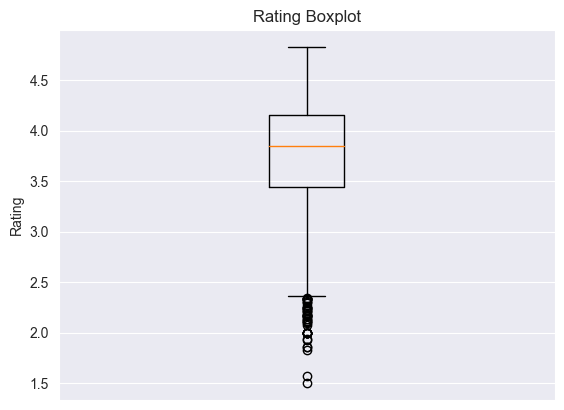

In [26]:
# Create boxplot
fig, ax = plt.subplots()
ax.boxplot(filteredDF['rating'])

# Set axis labels and title
ax.set_xticks([])
ax.set_ylabel('Rating')
plt.title('Rating Boxplot')


# Display the plot
plt.show()

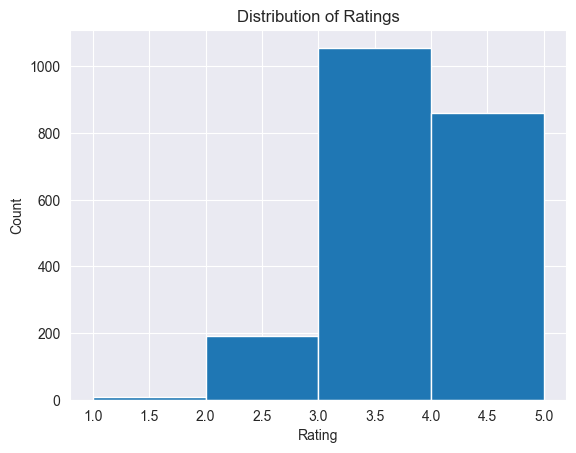

Bucket Distributions:

(3.0, 4.0]      1123
(4.0, 5.0]       770
(2.0, 3.0]       207
(0.999, 2.0]      14
Name: rating, dtype: int64


In [27]:
plt.hist(filteredDF['rating'], bins=[1, 2, 3, 4, 5])

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.show()

counts = filteredDF['rating'].value_counts(bins=[1, 2, 3, 4, 5])
print("Bucket Distributions:\n")
print(counts)

So we can learn a lot from these two simple visualizations, in conjunction with the strict statistical data we also pulled. It appears that, as we saw, most game reviews trend higher than lower. That is obvious by the placement of the IQR. It sits above the center of the scale, which is 3 ((1+5)/2). We also can more easily visualize that IQR with the box plot, but even in the histogram we can see it peaks around that IQR, which is consistent with the data we pulled. One interesting thing is that we have quite a few outliers on the lower end of the spectrum and none on the higher end. Just for fun, let's do a little outlier analysis to see how many outliers we have using the IQR.

In [28]:
upperRange = Q3 + 1.5 * IQR
lowerRange = Q1 - 1.5 * IQR

outliers = filteredDF[(filteredDF['rating'] > upperRange) | (filteredDF['rating'] < lowerRange)]

outliers

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms,month,day,year
29,Code of Princess,2012-04-19,2.17,2,6,486,0,6,2.95,Action,0.16,0.00,0.03,0.01,0.20,2,4,19,2012
93,Airline Tycoon 2,2011-10-04,1.57,1,7,466,0,7,2.86,Simulation,0.00,0.04,0.00,0.01,0.05,1,10,4,2011
105,Trapped Dead,2010-11-05,2.20,2,15,405,0,15,3.00,Strategy,0.00,0.02,0.00,0.00,0.02,1,11,5,2010
161,Jack Keane,2007-07-31,2.33,4,6,614,0,6,3.31,Adventure,0.00,0.02,0.00,0.00,0.03,2,7,31,2007
203,Take On Helicopters,2011-10-27,2.10,1,20,391,0,20,3.71,Simulation,0.00,0.02,0.00,0.01,0.03,1,10,27,2011
229,Sengoku,2011-09-12,2.14,2,7,360,0,7,3.67,Strategy,0.00,0.01,0.00,0.00,0.02,2,9,12,2011
230,Ship Simulator Extremes,2010-08-27,2.00,1,11,313,0,11,2.20,Simulation,0.00,0.04,0.00,0.01,0.05,1,8,27,2010
293,Dream Pinball 3D,2006-08-30,1.50,3,8,377,0,8,2.20,Misc,0.10,0.03,0.00,0.01,0.14,4,8,30,2006
308,Gunslingers,2011-08-05,2.17,1,6,563,0,6,2.67,Shooter,0.08,0.06,0.00,0.02,0.16,2,8,5,2011
315,Gun Metal,2002-06-30,2.30,4,27,420,0,27,3.17,Shooter,0.08,0.02,0.00,0.00,0.11,2,6,30,2002


Now that we have our outliers seperated out, let's take a look at them in slightly more depth.

In [29]:
num_outliers = outliers.shape[0]
outlier_percentage = (num_outliers/num_rows) * 100

print(f"There are {num_outliers} outliers in the ratings column. That means {outlier_percentage: .2f}% of the data is outliers!")




There are 45 outliers in the ratings column. That means  2.13% of the data is outliers!


Now we have some basic information about our rating column! Now, lets do the same thing for another column!

##### Global Sales

First, let's do the same check to see if there are any games that have 0 sales. From a cursory look at the data, it doesn't appear so, but it is always safe to check!

In [30]:
num_zero_sales = (totalDF['Global_Sales'] == 0).sum()
percent_zero_sales = (num_zero_sales / total_rows) * 100
print(f"Percentage of zero sales: {percent_zero_sales:.2f}%")

Percentage of zero sales: 0.00%


Excellent! This means we can look at our data set as a whole when it comes to global sales!

In [31]:
avg_sales = totalDF['Global_Sales'].mean()
min_sales = totalDF['Global_Sales'].min()
max_sales = totalDF['Global_Sales'].max()
std_sales = totalDF['Global_Sales'].std()
Q1 = totalDF['Global_Sales'].quantile(0.25)
Q3 = totalDF['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1


print(f"Average sales: {avg_sales:.2f}")
print(f"Minimum sales: {min_sales:.2f}")
print(f"Maximum sales: {max_sales:.2f}")
print(f"Standard deviation of sales: {std_sales:.2f}")
print(f"IQR of sales: {IQR:.2f}, with a range [{Q1: .2f}, {Q3: .2f}]")

Average sales: 0.85
Minimum sales: 0.01
Maximum sales: 82.74
Standard deviation of sales: 2.31
IQR of sales: 0.69, with a range [ 0.09,  0.78]


Before we analyze this data, just a quick reminder that this data is measured in millions USD($).

This information is very interesting! We cans see that average sales of video games, and even the Q3 datapoint, never exceeds 1 million dollars. This data will certainly have some outliers
 but before we get to that, lets plot this out as we did with the ratings.

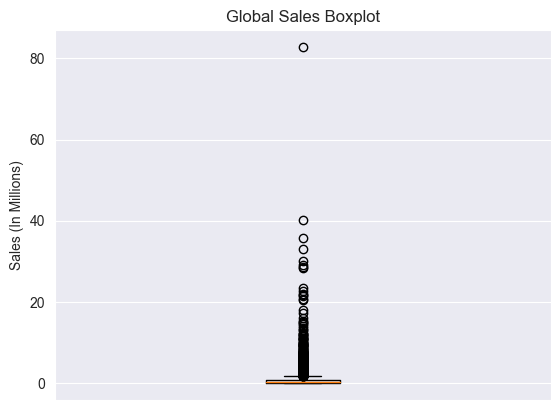

In [32]:
# Create the boxplot
fig, ax = plt.subplots()
ax.boxplot(totalDF['Global_Sales'])

# Set axis labels and title
ax.set_xticks([])
ax.set_ylabel('Sales (In Millions)')
plt.title('Global Sales Boxplot')

plt.show()

Alright, well it appears I was correct. This boxplot is not very useful because of all the ridiculous outliers. Let's see if there isn't something we can do about that. I am going to switch libraries for displaying my boxplot. Seaborn is a libray that let's you eliminate outliers from your boxplot!

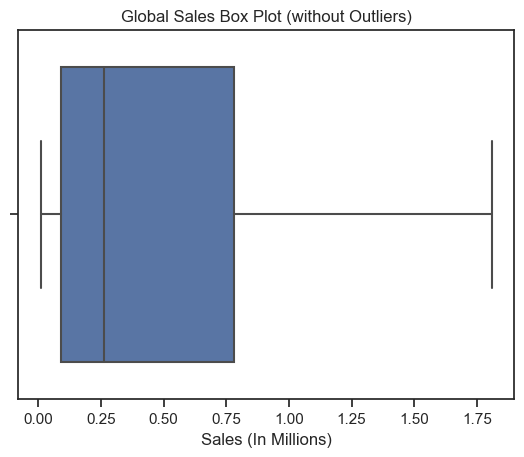

In [33]:
sns.set(style="ticks")

# Create box plot
sns.boxplot(x=totalDF['Global_Sales'], showfliers=False)

# Set axis labels and title
plt.xlabel('Sales (In Millions)')
plt.title('Global Sales Box Plot (without Outliers)')

# Display the plot
plt.show()

That is a lot better. While the data may be a bit skewed, it still is more useful than our previous boxplot!

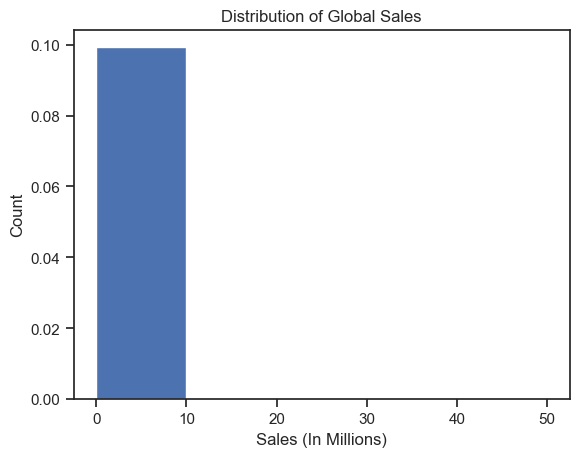

Bucket Distributions:

(-0.001, 10.0]    5149
(10.0, 20.0]        25
(20.0, 30.0]        10
(30.0, 40.0]         3
(40.0, 50.0]         1
Name: Global_Sales, dtype: int64


In [34]:
# Create histogram with four bins
plt.hist(totalDF['Global_Sales'], bins=[0, 10, 20, 30, 40, 50], density=True)

# Set axis labels and title
plt.xlabel('Sales (In Millions)')
plt.ylabel('Count')
plt.title('Distribution of Global Sales')

# Display the plot
plt.show()

# Get the number of data points in each range of values
counts = totalDF['Global_Sales'].value_counts(bins=[0, 10, 20, 30, 40, 50])

# Print the counts
print("Bucket Distributions:\n")
print(counts)

Because of our outliers, this histogram is also not very useful. The good news is that we have printed out the bins and how much is in each bin, so while visualizations may fail us here, good old data sure doesn't. So now, let's check out the outliers!

In [35]:
upperRange = Q3 + 1.5 * IQR
lowerRange = Q1 - 1.5 * IQR

outliers = totalDF[(totalDF['Global_Sales'] > upperRange) | (totalDF['Global_Sales'] < lowerRange)]

outliers

,name,released,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,dificulty,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,num_platforms,month,day,year
19,Turok 2: Seeds of Evil,1998-10-21,4.09,1,47,464,0,47,3.73,Platform,1.37,0.41,0.04,0.04,1.86,4,10,21,1998
25,Mortal Kombat X,2015-04-07,3.86,7,1398,697,19,1400,2.83,Fighting,1.47,0.76,0.00,0.47,2.70,5,4,7,2015
33,Secret of Mana,2010-12-21,3.28,4,32,279,0,32,2.76,Role-Playing,0.25,0.07,1.49,0.02,1.83,5,12,21,2010
34,Call of Duty: Modern Warfare 3,2011-11-07,3.70,8,1006,647,24,1007,2.81,Shooter,9.03,4.28,0.13,1.32,14.76,7,11,7,2011
41,Left 4 Dead 2,2009-11-17,4.10,9,2107,610,2,2116,3.38,Shooter,2.67,0.89,0.05,0.37,3.99,2,11,17,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Call of Duty: Advanced Warfare,2014-11-03,3.43,8,536,607,24,538,2.66,Shooter,2.80,3.30,0.14,1.37,7.60,5,11,3,2014
5168,Halo 5: Guardians,2015-10-27,3.75,0,372,421,14,376,2.96,Shooter,2.64,1.20,0.03,0.39,4.26,1,10,27,2015
5170,Halo: The Master Chief Collection,2014-11-11,4.29,5,611,622,14,613,3.36,Shooter,1.89,0.99,0.03,0.24,3.15,2,11,11,2014
5171,Call of Duty: Black Ops,2010-11-09,4.01,9,1183,693,24,1189,3.31,Shooter,9.67,3.73,0.11,1.13,14.64,8,11,9,2010


And finally, let's get some information about these outliers!

In [36]:
num_rows = totalDF.shape[0]
num_outliers = outliers.shape[0]
outlier_percentage = (num_outliers/num_rows) * 100

min_sales = outliers['Global_Sales'].min()
max_sales = outliers['Global_Sales'].max()

print(f"There are {num_outliers} outliers in the ratings column. That means {outlier_percentage: .2f}% of the data is outliers!")
print(f"The maximum outlier, and top selling game, is Wii Sports with{max_sales: .2f} million dollars in sales.")
print(f"The minimum outlier is{min_sales: .2f} dollars in sales.")



There are 545 outliers in the ratings column. That means  10.50% of the data is outliers!
The maximum outlier, and top selling game, is Wii Sports with 82.74 million dollars in sales.
The minimum outlier is 1.82 dollars in sales.


This is very interesting information to have. First of all, we see that 10.5% of all of our data is outliers. That number feels pretty high, but that also represents all games that make more than 1.82 million dollars in sales. While that seems a lot, it appears that 10.5% of all games (that sell more then 100,000 copies) accomplish that feat. This is interesting and we may look more into what makes these outliers special later! (Fun fact, Wii Sports being the top-selling game of all time is misleading, as it was sold with every unit of the Nintendo Wii, so if you bought the system first hand, you technically "purchased" a copy of Wii Sports)

## Mulitvariate Analysis
Now, lets take some time to look at how a few different variables may have impacted sales and reviews!

#### Ratings vs. Sales
We will start by looking at what I believe is the obvious. Let's check ratings against global sales (I will be removing the outliers and items that have 0 reviews for this)



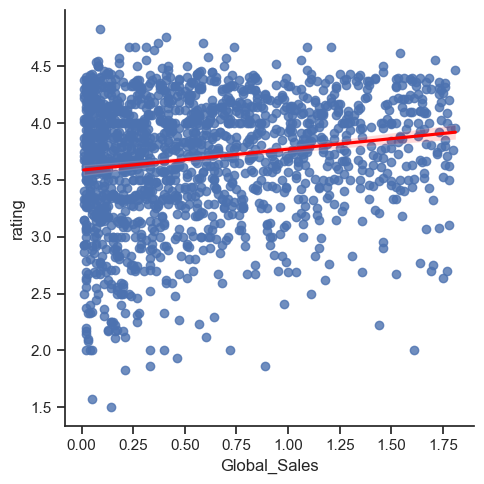

In [37]:
RatingSalesDF = totalDF[(totalDF['Global_Sales'] <= upperRange) & (totalDF['Global_Sales'] >= lowerRange)]
RatingSalesDF =  RatingSalesDF[RatingSalesDF['rating'] > 0]


sns.lmplot(x='Global_Sales', y='rating', data=RatingSalesDF, line_kws={'color': 'red'})

plt.show()

Okay. From here, it does look like there is a slight positive correlation here. Nothing staggering, but games that are reviewed better do seem to sell better. Not a big surprise there.

Now let's look at release month and see if that has any affect. We'll take a look at reviews first!

In [38]:
no_outliers = totalDF[(totalDF['Global_Sales'] <= upperRange) & (totalDF['Global_Sales'] >= lowerRange)]


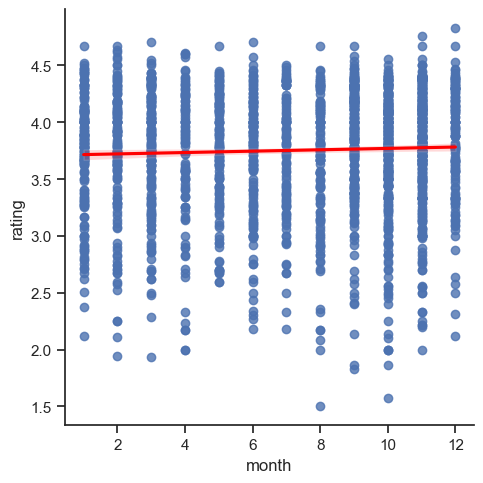

In [39]:
sns.lmplot(x='month', y='rating', data=filteredDF, line_kws={'color': 'red'})

plt.show()

It appears that release month does not have an effect on review ratings. Let's try sales, and for now, we are going to get rid of our outliers for cleaner data! May add them back later, but for now, let's get rid of them!

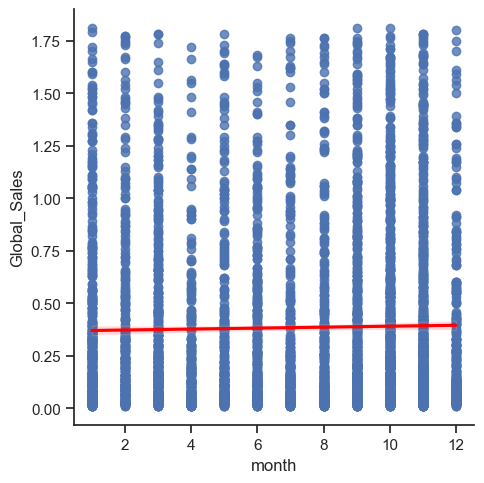

In [40]:
sns.lmplot(x='month', y='Global_Sales', data=no_outliers, line_kws={'color': 'red'})

plt.show()

Same story here. It appears release month does not have an effect on most sales. Finally, let's check the outliers. Maybe there is something more interesting there!

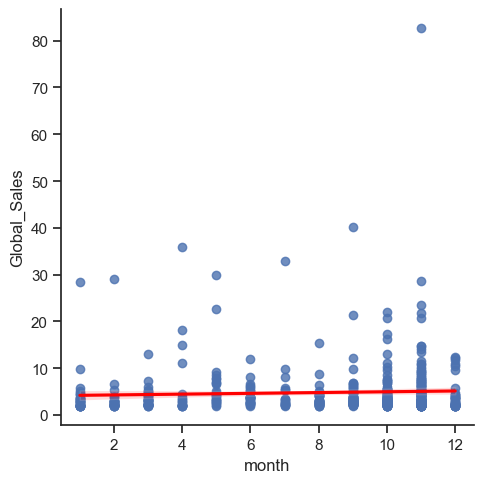

In [41]:
sns.lmplot(x='month', y='Global_Sales', data=outliers, line_kws={'color': 'red'})

plt.show()

Well there you have it. From a first glance, it appears that maybe the month of release does not have much to do with game sales overall. That makes sense. Perhaps if we had data one sales within the first 30 days of release, that would tell a different story, but it appears that time here is the great equalizer and that over time, overall sales do not seem to care about when a game is released.

### Other Variables

Let's take a look at some other variables all at once and see if we cant see anything interesting! Once again, we will do this without outliers and all the items with no rating!



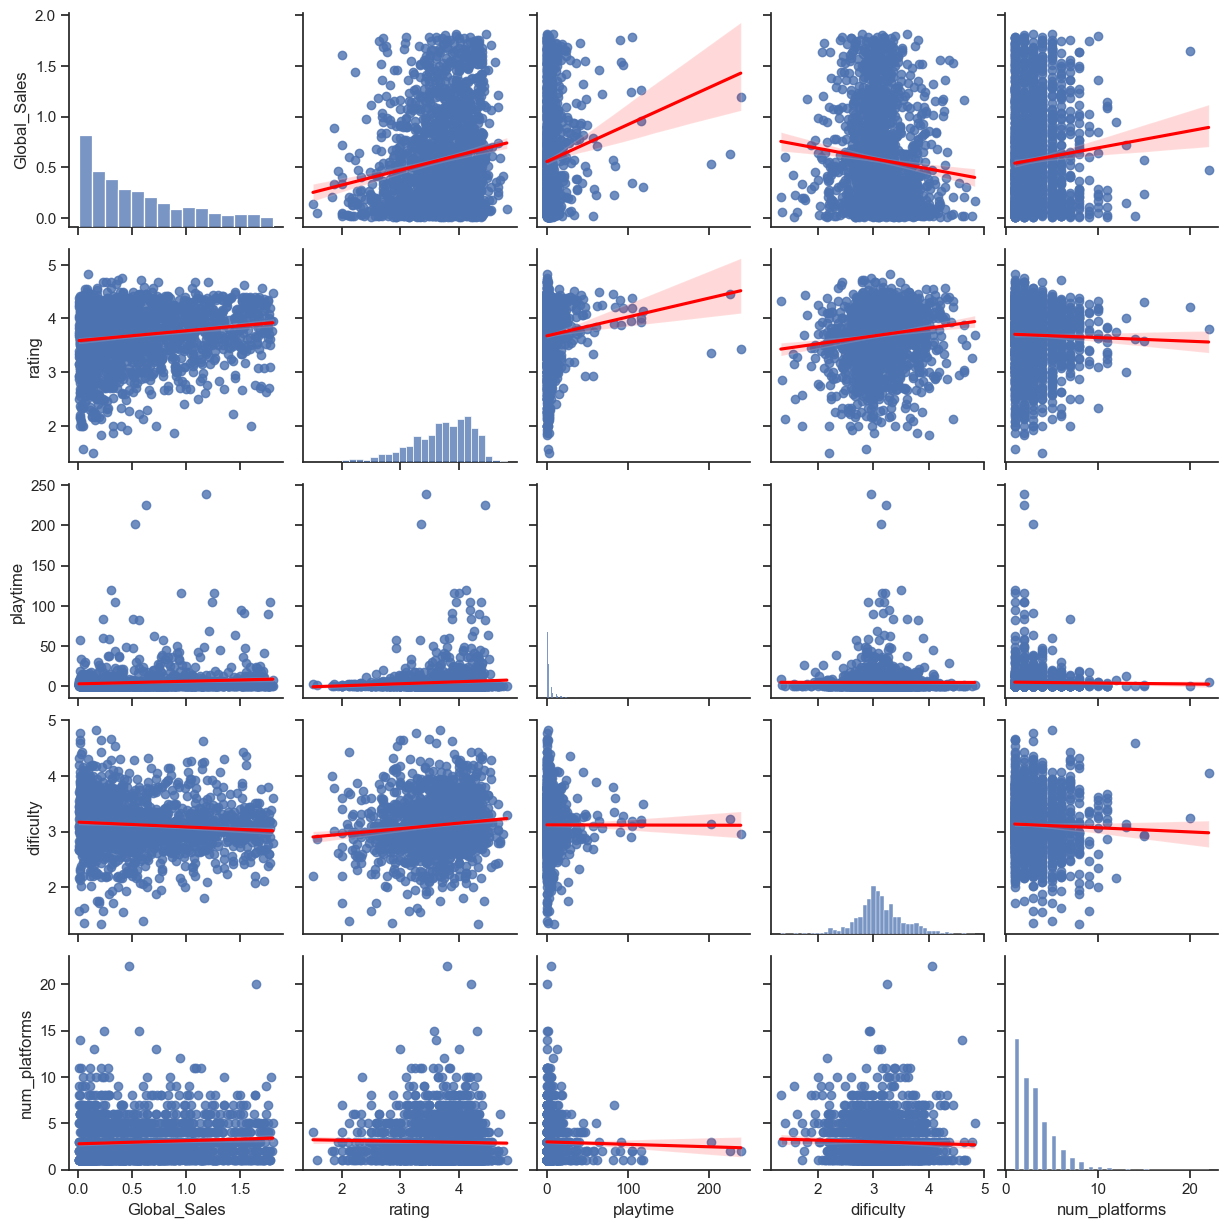

In [42]:
sns.pairplot(RatingSalesDF, vars=['Global_Sales', 'rating', 'playtime', 'dificulty', 'num_platforms'], kind='reg',  plot_kws={'line_kws':{'color':'red'}})

Wow! That's a lot of information! I think most of what I find interesting is in that top right quadrant.

- First of all, there appears to be a positive correlation between playtime (time it takes, on average, to beat a game) and its rating, as well as its sales!
- Difficultly seems to be an interesting indicator as well. It appears that more difficult games, while not selling quite as well, are rated better. This makes sense but is interesting to see visualized.
- As to be expected, there seems to be a correlation between sales and number of platforms a game is released on. The more platforms, the higher the sales. This makes perfect sense, since for every platform/console you release a game to, that is a whole new audience for that game.



### Modeling some of the data

Let's do some modeling with some of this data! We can start with global sales.

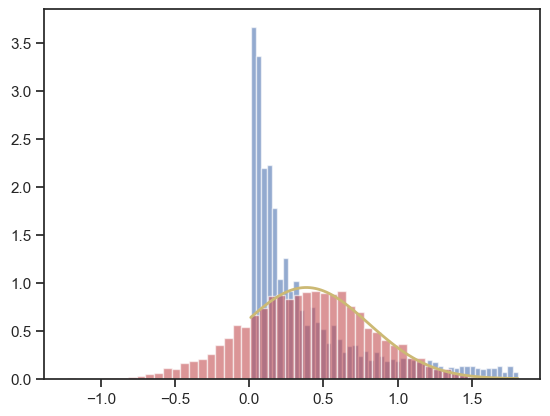

In [43]:
data = no_outliers["Global_Sales"].values

mu, sigma = norm.fit(data)

rv = np.random.normal(mu, sigma, 5000)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
plt.hist(rv, bins=50, density=True, alpha=0.6, color='r')

x = np.linspace(np.min(data), np.max(data), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'y', lw=2)

plt.show()

So this is very interesting. The red histogram here represents the results of the random variable, while the blue histogram is the actual data. Finally, the yellow line is the PDF, Now, what I found interesting is the shape of the PDF, since it starts at 0, which makes sense for the way it is distributed. That being said, a normalized model doesn't seem to be fitting here!

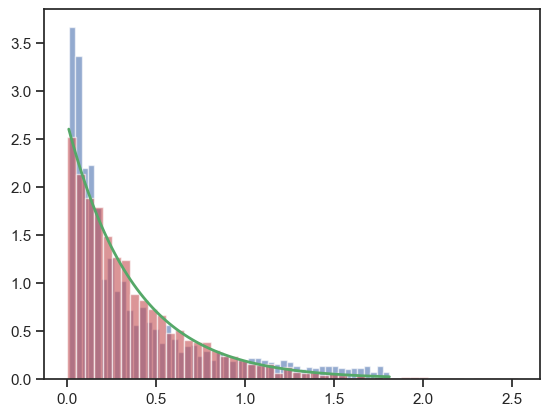

In [44]:
# Estimate the scale parameter of the exponential distribution
scale = expon.fit(data)[1]

# Generate 1000 random variables from an exponential distribution with the estimated scale parameter
rv = np.random.exponential(scale, 5000)

# Plot the histogram of the data and the generated random variables
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
plt.hist(rv, bins=50, density=True, alpha=0.6, color='r')

# Plot the probability density function of the exponential distribution with the estimated scale parameter
x = np.linspace(np.min(data), np.max(data), 100)
pdf = expon.pdf(x, scale=scale)
plt.plot(x, pdf, 'g', lw=2)

plt.show()

That looks significantly better and fits our data quite well. So we can see that the data of video game sales is certainly exponentially distributed. Finally, let's plot the CDF of the sales data!

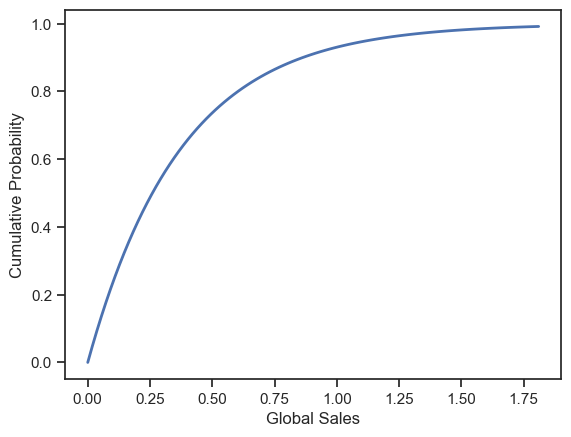

In [45]:
x = np.linspace(0, np.max(data), 100)

cdf = expon.cdf(x, scale=scale)

plt.plot(x, cdf, 'b', lw=2)

plt.xlabel("Global Sales")
plt.ylabel("Cumulative Probability")

plt.show()

And there we have it. Some good analysis of the global sales data. Now we can move on to reviews.

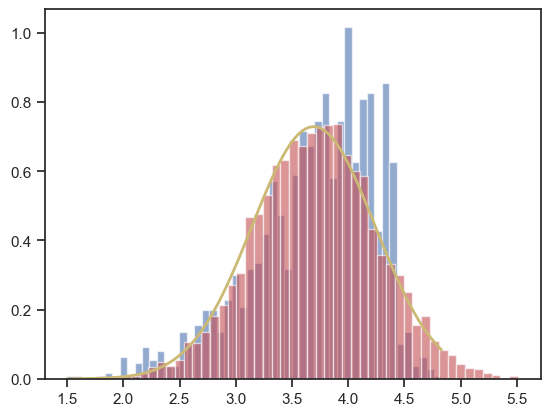

In [46]:
data = RatingSalesDF["rating"].values

mu, sigma = norm.fit(data)

rv = np.random.normal(mu, sigma, 5000)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
plt.hist(rv, bins=50, density=True, alpha=0.6, color='r')

x = np.linspace(np.min(data), np.max(data), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'y', lw=2)

plt.show()

This time, I think that a normalized distribution does fit quite well. It's not perfect, as we see some data sticking out over on the right side of the graph, but it is as close as I think we are going to get.

For those reviewing, if there is another distribution you know of that would fit this data better, by all means please let me know! I will give you credit in my final report :)

Now, let's look at the CDF of the ratings data.


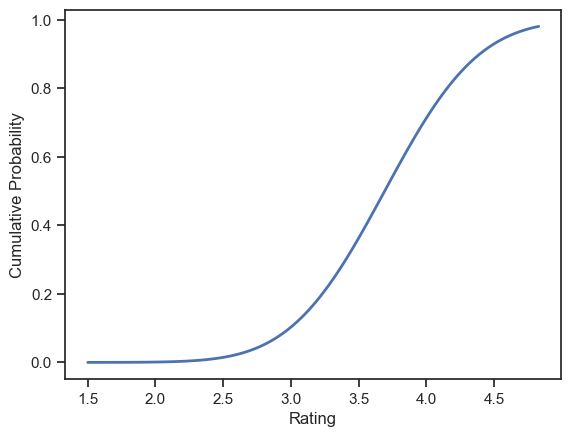

In [47]:
x = np.linspace(np.min(data), np.max(data), 100)

# Compute the CDF of the normal distribution with the estimated parameters
cdf = norm.cdf(x, mu, sigma)

# Plot the CDF of the normal distribution
plt.plot(x, cdf, 'b', lw=2)

# Set the x and y axis labels
plt.xlabel("Rating")
plt.ylabel("Cumulative Probability")

plt.show()



And there we have it! We have modeled the distributions for our two most important metrics when it comes to game success. We have also looked at the data lots of different ways to see how it looks on its own, as well as how other variables seem to influence it.


## Regression Modeling
#### Ratings

Now, it is time to do some regression modeling! Let's start with the ratings:

I believe that we are going to have a mutli-variate regression model, so let's run some tests and see how close that is with this data.

In [48]:
filteredDF = totalDF[totalDF['rating'] > 0]

multi_lm = smf.ols('rating ~ playtime * dificulty * num_platforms', data=filteredDF).fit()

print(multi_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     9.062
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           4.62e-11
Time:                        18:27:36   Log-Likelihood:                -1644.4
No. Observations:                2114   AIC:                             3305.
Df Residuals:                    2106   BIC:                             3350.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Well that doesn't seem to fit very well at all. Let's try another model then. Let's look at the logritmic model.

In [49]:
# Create a new variable with the natural logarithm of 'rating'
filteredDF["ln_rating"] = np.log(filteredDF["rating"])

# This adds a field that shows us the interactivity of playtime and difficulty
filteredDF["playtime_dificulty"] = filteredDF["playtime"] * filteredDF["dificulty"]


# Specify the independent variables for the regression model
X = filteredDF[["playtime", "dificulty", "playtime_dificulty", "num_platforms"]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Specify the dependent variable for the regression model
y = filteredDF["ln_rating"]

# Fit the regression model using ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

# Print the summary statistics for the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_rating   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     14.58
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           9.49e-12
Time:                        18:27:36   Log-Likelihood:                 929.10
No. Observations:                2114   AIC:                            -1848.
Df Residuals:                    2109   BIC:                            -1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1736      0

C:\Users\boysl\AppData\Local\Temp\ipykernel_84260\1127201416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF["ln_rating"] = np.log(filteredDF["rating"])
C:\Users\boysl\AppData\Local\Temp\ipykernel_84260\1127201416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF["playtime_dificulty"] = filteredDF["playtime"] * filteredDF["dificulty"]


Well that fit even worse! Okay, well from analyzing the data, we can see that it at least appears that difficulty has some sort of effect on the rating! So, let's just look at that!

In [50]:
# Specify the independent variable for the regression model
X = filteredDF["dificulty"]

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Specify the dependent variable for the regression model
y = filteredDF["rating"]

# Fit the regression model using ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

# Print the summary statistics for the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.05
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.74e-09
Time:                        18:27:36   Log-Likelihood:                -1658.4
No. Observations:                2114   AIC:                             3321.
Df Residuals:                    2112   BIC:                             3332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2717      0.082     39.854      0.0

Well, that seems to not fit very well. I guess while there appears to be a correlation with these values, the regerssion analysis shows that it is not strong enough to be signficiant and be a good predictor. No worries, we can still look at sales and do some analysis there!

#### Sales

In [51]:
multi_lm = smf.ols('Global_Sales ~ playtime * dificulty * num_platforms * rating', data=filteredDF).fit()


print(multi_lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     19.51
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           9.58e-50
Time:                        18:27:36   Log-Likelihood:                -5434.5
No. Observations:                2114   AIC:                         1.090e+04
Df Residuals:                    2098   BIC:                         1.099e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [52]:
# Create a new variable with the natural logarithm of 'Global_Sales'
filteredDF["ln_Global_Sales"] = np.log(filteredDF["Global_Sales"])

# Specify the regression formula with logarithmic dependent variable
multi_lm = smf.ols('ln_Global_Sales ~ playtime * dificulty * num_platforms * rating', data=filteredDF).fit()

# Print the summary statistics for the model
print(multi_lm.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_Global_Sales   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     21.98
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.81e-56
Time:                        18:27:36   Log-Likelihood:                -3733.1
No. Observations:                2114   AIC:                             7498.
Df Residuals:                    2098   BIC:                             7589.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

C:\Users\boysl\AppData\Local\Temp\ipykernel_84260\4020248239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF["ln_Global_Sales"] = np.log(filteredDF["Global_Sales"])


These are also still pretty weak metrics that have very low R-Squared values, where none of them even crack the .15 mark.

## Thoughts and Conclusions

Well, at the end of the day, what have we found? Video games are complicated things. According to Statista, 10,936 games were released just on the Steam PC platform in 2022 alone (Statista, 2022). That is a lot of video games, and obviously not all of them are successful. It appears that metrics such as length of a game, difficulty, number of platforms, and even ratings do little to influence a game's sales figures. It takes much more than that. It takes, in this student's and hobbyist's opinion, a team of people that are dedicated to creating something great. Now, as we can see from some of our data, there are certain predictors that seem to have a slight influence on a game's sales and ratings. For example, a longer game seems to be better reviewed. Better reviewed games seem to sale a bit better. But that is not always the case! Take the recent surprise release of Hifi Rush by publisher Bethesda Softworks and developer Tango Frameworks. Currently sitting at an 89 Metacritic score with an average user review of 8.8, this game impressed critics in every way. It was original, it was fun, it was stylistic. It checked many boxes. But just today, stories are coming out about how this game, in the eyes of Xbox (the owner of publisher Bethesda Softworks), "didn't make the money it needed to make" (McWhertor, 2023). This is just a sign of markets, strategies, and even audiences caning. This game was shadow released, meaning it had no marketing leading up to its release. It was also made available on Xbox Game Pass on the day of its release. This means that those who are subscribed to the platform did not need to pay for it and were able to download it as part of their subscription. Such services are becoming commonplace in the current video game market, and will certainly have a large impact on sales numbers. So even if we came to some conclusive solutions here on how to affect sales numbers, it is a very real possibility that those conclusions will be useless in the next 5-10 years as the industry evolves and the markets adapt.

## What I Would Change

If I were to do this assignment again with the same data, I think I would change the parameters I looked at. This time around, I look exclusively at quantitative factors. Primarily;  difficulty, game length, rating, and number of platforms released. There was other data such as developer, publisher, and genre that are qualitative factors that could have been explored more deeply using classification. That could have provided some additional insights. Also, I think that if I were able to obtain sales data on specifically the first 2 months after a release of a game, as opposed to how much it made in its entire life cycle, I could have done some interesting analysis as well. Finally, knowing things such as marketing budgets or other variables that are believed to have a more direct impact on sales would have been good as well. I am proud of this project, even if the results are not quite what you expected. In fact, if you are simply verifying something you already assumed, you aren't learning too much! Its when you fail or find out what you believe is not true that, in my opinion, you have truly learned something!

Thank you for taking the time to look at this project. I hope you had as much fun reviewing it as I had putting it all together!

# Bibliography

Gregorut. (2016). Video Games Sales. Retrieved from https://www.kaggle.com/gregorut/videogamesales

JummyEgg. (2021). RAWG Video Games Database. Retrieved from https://www.kaggle.com/jummyegg/rawg-game-dataset

Patkle. (2019). GameFAQs 82,100 Rankings, Length, and Difficulty. Retrieved from https://www.kaggle.com/patkle/gamefaqs-82100-rankings-length-and-difficulty

Statista. (2022). Number of games released on Steam worldwide from 2013 to 2021. Retrieved April 24, 2023, from https://www.statista.com/statistics/552623/number-games-released-steam/

McWhertor, M. (2023). Critically acclaimed Hi-Fi Rush didn't make the money it needed to make - report. Gamespot. https://www.gamespot.com/articles/critically-acclaimed-hi-fi-rush-didnt-make-the-money-it-needed-to-make-report/1100-6513467/